Import Libraries

In [1]:
import sys
print(sys.executable)


c:\Users\3C Tech\.conda\envs\ml-exercise\python.exe


In [2]:
!{sys.executable} -m pip show xgboost


'c:\Users\3C' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
! "c:\Users\3C Tech\.conda\envs\ml-exercise\python.exe" -m pip install xgboost
! "c:\Users\3C Tech\.conda\envs\ml-exercise\python.exe" -m pip install lightgbm


In [4]:
# Imports
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import xgboost as xgb

import pickle

# Load the dataset

In [ ]:
df = pd.read_csv("data/health_fitness_dataset.csv")
print("Dataset loaded successfully!\n")

# Quick look at data shape and head
print(f"Dataset Shape: {df.shape}\n")
print("First 5 rows:")
print(df.head())

Dataset loaded successfully!

Dataset Shape: (2040, 10)

First 5 rows:
   Age  Gender  Weight_kg  Height_cm   BMI  Activity_Level Exercise_Type  MET  \
0   38  Female       58.2      161.3  22.4  Lightly Active       Running  8.0   
1   48    Male       65.0      178.2  20.5       Sedentary       Cycling  6.0   
2   57  Female       46.6      159.8  18.3  Lightly Active       Walking  3.5   
3   39  Female       58.9        NaN   NaN     Very Active       Walking  3.5   
4   54  Female       65.0      156.6  26.5       Sedentary       Running  8.0   

   Target_Calories  Duration_minutes  
0              654              73.0  
1              504              71.3  
2              630             180.0  
3              632             175.7  
4              535              63.4  


In [6]:
df.columns

Index(['Age', 'Gender', 'Weight_kg', 'Height_cm', 'BMI', 'Activity_Level',
       'Exercise_Type', 'MET', 'Target_Calories', 'Duration_minutes'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [7]:
print("\n--- EDA ---")
print("Data Info:")
print(df.info())

print("\nSummary statistics for numerical columns:")
print(df.describe())

print("\nMissing values count per column:")
print(df.isnull().sum())

print("\nDuplicate rows count:", df.duplicated().sum())


--- EDA ---
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2040 non-null   int64  
 1   Gender            2040 non-null   object 
 2   Weight_kg         1940 non-null   float64
 3   Height_cm         1939 non-null   float64
 4   BMI               1940 non-null   float64
 5   Activity_Level    2040 non-null   object 
 6   Exercise_Type     2040 non-null   object 
 7   MET               2040 non-null   float64
 8   Target_Calories   2040 non-null   int64  
 9   Duration_minutes  2040 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 159.5+ KB
None

Summary statistics for numerical columns:
               Age    Weight_kg    Height_cm          BMI          MET  \
count  2040.000000  1940.000000  1939.000000  1940.000000  2040.000000   
mean     39.181863    59.728402   164.101960 

# Visualization

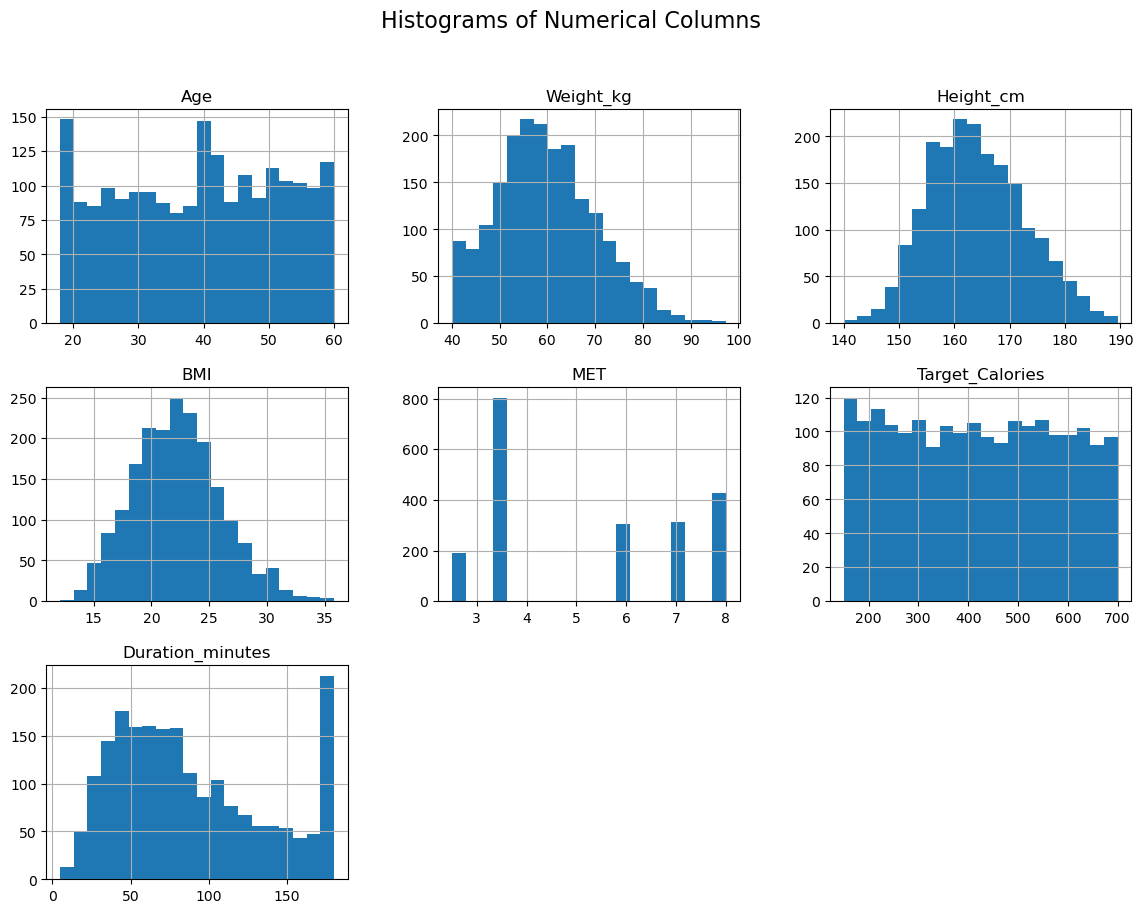

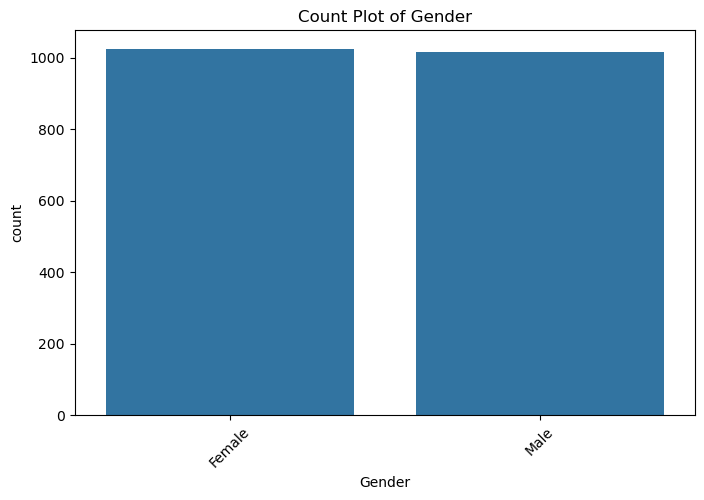

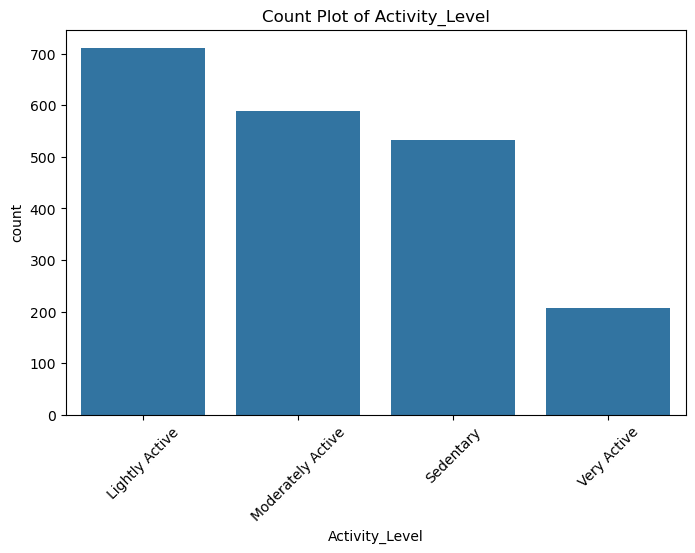

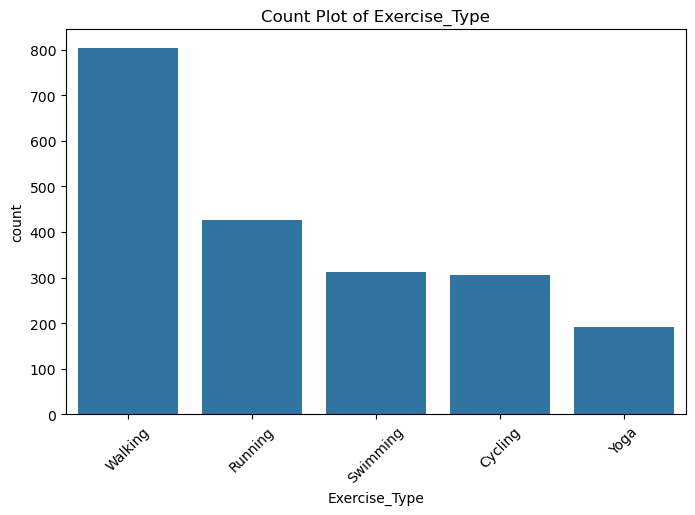

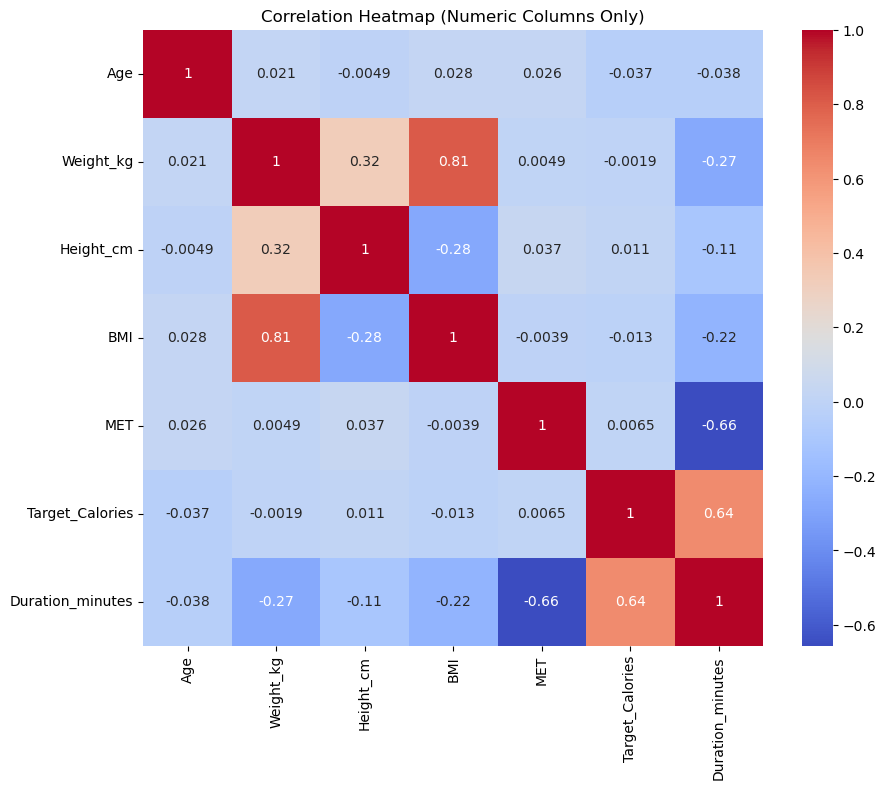

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for numerical columns
df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Histograms of Numerical Columns", fontsize=16)
plt.show()

# 2. Count plots for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# 3. Correlation heatmap (numerical columns only)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

# Handle missing values

In [9]:
# Seperate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# the target column
target_col = 'Duration_minutes'

# Remove target from numerical features
numerical_cols.remove(target_col)

print("\nNumerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['Age', 'Weight_kg', 'Height_cm', 'BMI', 'MET', 'Target_Calories']
Categorical columns: ['Gender', 'Activity_Level', 'Exercise_Type']


In [10]:
# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute categorical cols with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
Age                 0
Gender              0
Weight_kg           0
Height_cm           0
BMI                 0
Activity_Level      0
Exercise_Type       0
MET                 0
Target_Calories     0
Duration_minutes    0
dtype: int64


# Remove Duplicates

In [11]:
duplicates = df[df.duplicated()]
print(duplicates)

df = df.drop_duplicates()

       Age  Gender  Weight_kg  Height_cm   BMI     Activity_Level  \
110   46.0    Male       73.5      162.8  27.7     Lightly Active   
299   20.0    Male       88.0      164.7  32.4     Lightly Active   
331   45.0    Male       54.9      167.9  19.5     Lightly Active   
351   45.0    Male       77.0      184.3  22.7  Moderately Active   
366   58.0  Female       49.7      169.9  17.2     Lightly Active   
525   44.0    Male       53.7      184.4  15.8  Moderately Active   
687   32.0  Female       59.6      168.5  21.0  Moderately Active   
704   34.0  Female       55.1      155.3  22.9          Sedentary   
717   51.0  Female       47.7      166.3  17.2          Sedentary   
789   46.0  Female       52.8      159.9  20.7          Sedentary   
881   29.0    Male       56.9      155.2  23.6  Moderately Active   
920   40.0    Male       58.8      176.9  18.8  Moderately Active   
922   41.0    Male       79.2      160.0  30.9  Moderately Active   
964   57.0  Female       43.0     

## Label Encoding

In [12]:
# Label encode all categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nSample after encoding categorical variables:")
print(df.head())


Sample after encoding categorical variables:
    Age  Gender  Weight_kg  Height_cm   BMI  Activity_Level  Exercise_Type  \
0  38.0       0       58.2      161.3  22.4               0              1   
1  48.0       1       65.0      178.2  20.5               2              0   
2  57.0       0       46.6      159.8  18.3               0              3   
3  39.0       0       58.9      163.4  22.1               3              3   
4  54.0       0       65.0      156.6  26.5               2              1   

   MET  Target_Calories  Duration_minutes  
0  8.0            654.0              73.0  
1  6.0            504.0              71.3  
2  3.5            630.0             180.0  
3  3.5            632.0             175.7  
4  8.0            535.0              63.4  


# Feature scaling

In [13]:
scaler = MinMaxScaler()
features = numerical_cols + categorical_cols
df[features + [target_col]] = scaler.fit_transform(df[features + [target_col]])

print("\nSample after scaling:")
print(df.head())


Sample after scaling:
        Age  Gender  Weight_kg  Height_cm       BMI  Activity_Level  \
0  0.476190     0.0   0.317073   0.430303  0.434599        0.000000   
1  0.714286     1.0   0.435540   0.771717  0.354430        0.666667   
2  0.928571     0.0   0.114983   0.400000  0.261603        0.000000   
3  0.500000     0.0   0.329268   0.472727  0.421941        1.000000   
4  0.857143     0.0   0.435540   0.335354  0.607595        0.666667   

   Exercise_Type       MET  Target_Calories  Duration_minutes  
0           0.25  1.000000         0.916364          0.388571  
1           0.00  0.636364         0.643636          0.378857  
2           0.75  0.181818         0.872727          1.000000  
3           0.75  0.181818         0.876364          0.975429  
4           0.25  1.000000         0.700000          0.333714  


# Train-validation-test split

In [14]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [15]:
# 70% train, 30% temp split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# 15% validation, 15% test split from temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print(f"\nTrain shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test.shape}")


Train shape: (1400, 9)
Validation shape: (300, 9)
Test shape: (300, 9)


# Define evaluation function

In [16]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} => MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")
    return {"Model": name, "MSE": mse, "RMSE": rmse, "R2": r2}

# Train models and evaluate

In [17]:
results = []

# MLP Regressor
mlp_model = MLPRegressor(hidden_layer_sizes=(64,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred = mlp_model.predict(X_test)
results.append(evaluate_model("MLP", y_test, y_pred))

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
results.append(evaluate_model("Random Forest", y_test, y_pred))

# Support Vector Regressor (SVR)
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
results.append(evaluate_model("SVM", y_test, y_pred))

MLP => MSE: 0.0046, RMSE: 0.0680, R²: 0.9389
Random Forest => MSE: 0.0017, RMSE: 0.0408, R²: 0.9780
SVM => MSE: 0.0030, RMSE: 0.0551, R²: 0.9600


# Summary of results

In [18]:
results_df = pd.DataFrame(results)
print("\nModel performance summary:")
print(results_df)


Model performance summary:
           Model       MSE      RMSE        R2
0            MLP  0.004625  0.068008  0.938950
1  Random Forest  0.001667  0.040824  0.978002
2            SVM  0.003032  0.055061  0.959982


# visualizations of the model performances

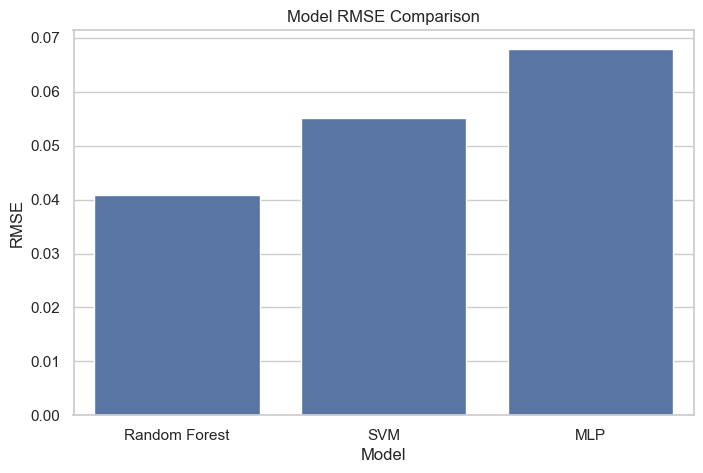

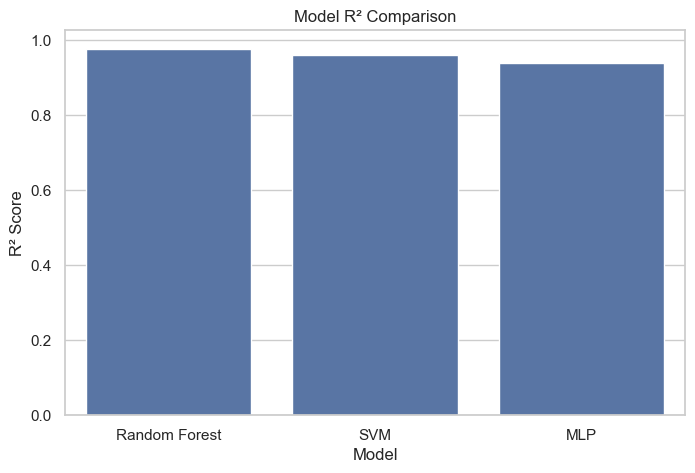

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot RMSE for each model
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='RMSE', data=results_df.sort_values('RMSE'))
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.show()

# Plot R² for each model
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2', data=results_df.sort_values('R2', ascending=False))
plt.title('Model R² Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.show()


# Save the best model (based on RMSE)

In [20]:
best_model_name = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
print(f"\nBest model: {best_model_name}")

model_dict = {
    'MLP': mlp_model,
    'Random Forest': rf_model,
    'SVM': svm_model
}

best_model = model_dict[best_model_name]

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("\nBest model saved as 'best_model.pkl'")


Best model: Random Forest

Best model saved as 'best_model.pkl'
